<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90_ADP26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 확인 및 전처리

1.1 결측치를 확인하고, 결측치 제거할 것

1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

데이터 설명

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [ ]:
df.shape


(35801, 8)


1.1 결측치를 확인하고, 결측치 제거할 것

In [ ]:
df.isna().sum()


InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [ ]:
# Quantity 제거
df1 = df.dropna(subset = ['Quantity', 'UnitPrice'])

1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35679 non-null  object 
 1   StockCode    35679 non-null  object 
 2   Description  35679 non-null  object 
 3   Quantity     35679 non-null  float64
 4   InvoiceDate  35679 non-null  object 
 5   UnitPrice    35679 non-null  float64
 6   CustomerID   35679 non-null  float64
 7   Country      35679 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


In [ ]:
df1 = df1[df1['Quantity'] > 0]


<Axes: xlabel='Quantity'>

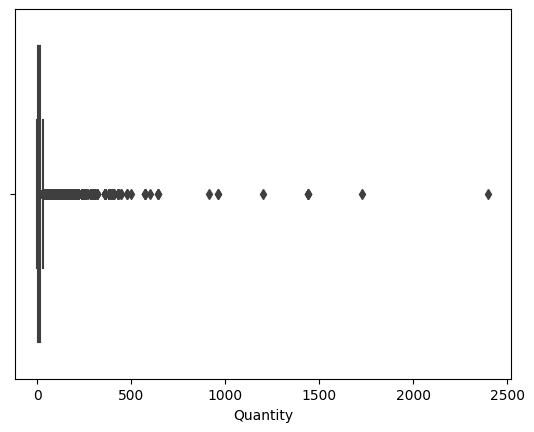

In [ ]:
import seaborn as sns
# Quantity 이상치 제거 후
sns.boxplot(x = 'Quantity', data = df1)


In [ ]:

# IQR 을 이용한 이상치 탐색 함수

def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx


In [ ]:
out_index = detect_outliers(df = df1, column='Quantity')
out_index


Int64Index([    7,    20,    24,    25,    30,    33,    50,    53,    54,
               56,
            ...
            35708, 35715, 35716, 35724, 35733, 35753, 35769, 35777, 35783,
            35791],
           dtype='int64', length=3723)

In [ ]:
# outlier 대체 (중위 값 혹은 평균값으로)
df1.loc[out_index,'Quantity'] = df1['Quantity'].mean()


<Axes: xlabel='Quantity'>

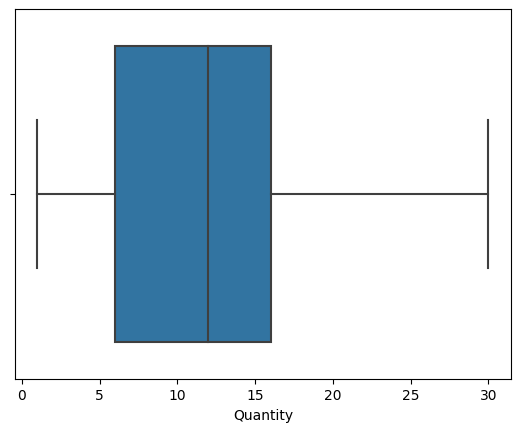

In [ ]:

# Quantity 이상치 제거 후
sns.boxplot(x = 'Quantity', data = df1)

In [ ]:
df1.loc[df1['UnitPrice'] ==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2794,574252,M,Manual,1.000000,11/3/2011 13:24,0.0,12437.0,France
3798,561669,22960,JAM MAKING SET WITH JARS,11.000000,7/28/2011 17:09,0.0,12507.0,Spain
3948,564651,22955,36 FOIL STAR CAKE CASES,19.249856,8/26/2011 14:19,0.0,14646.0,Netherlands
8693,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.000000,12/5/2010 14:02,0.0,12647.0,Germany
18365,564651,21786,POLKADOT RAIN HAT,19.249856,8/26/2011 14:19,0.0,14646.0,Netherlands
20990,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,19.249856,8/26/2011 14:19,0.0,14646.0,Netherlands
24207,577168,M,Manual,1.000000,11/18/2011 10:42,0.0,12603.0,Germany
27592,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1.000000,4/14/2011 18:57,0.0,12457.0,Switzerland
28345,562973,23157,SET OF 6 NATIVITY MAGNETS,19.249856,8/11/2011 11:42,0.0,14911.0,EIRE
31375,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,19.249856,8/26/2011 14:19,0.0,14646.0,Netherlands


In [ ]:

# IQR로 이상치를 찾아 인덱스 저장되어 있음 

out_index = detect_outliers(df = df1, column='UnitPrice')
# outlier 대체 (중위 값 혹은 평균값으로)
df1.loc[out_index,'UnitPrice'] = df1['UnitPrice'].mean()


<Axes: xlabel='UnitPrice'>

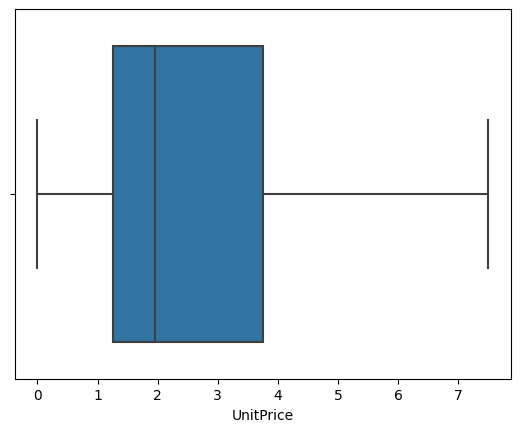

In [ ]:
# UnitPrice 이상치 제거 후
sns.boxplot(x='UnitPrice',data = df1)





In [ ]:

df2 = df1.copy()







1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X1 = df2[['Quantity', 'UnitPrice']]


In [ ]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 7):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,7), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

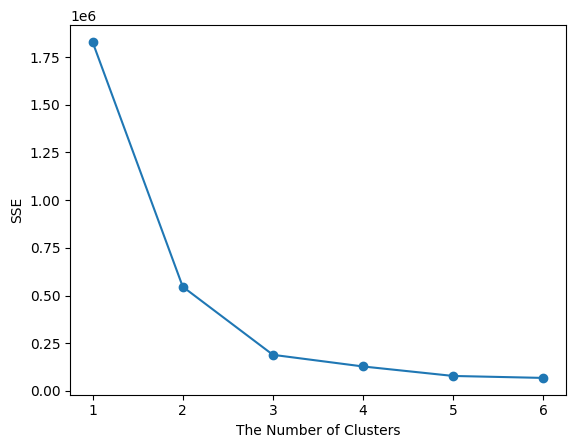

[1829171.2862217207, 546038.2042834044, 189180.73457886686, 128066.47340383487, 78384.74144430707, 68102.85947794943]


In [ ]:
elbow(X1)


In [ ]:
km = KMeans(n_clusters = 3, random_state=1)
km.fit(X1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [ ]:
new_labels = km.labels_

In [ ]:

X1['cluster'] = new_labels


<ipython-input-27-8467ed3000fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['cluster'] = new_labels


In [ ]:
X1['cluster'].value_counts()


1    13660
0    12678
2     8350
Name: cluster, dtype: int64

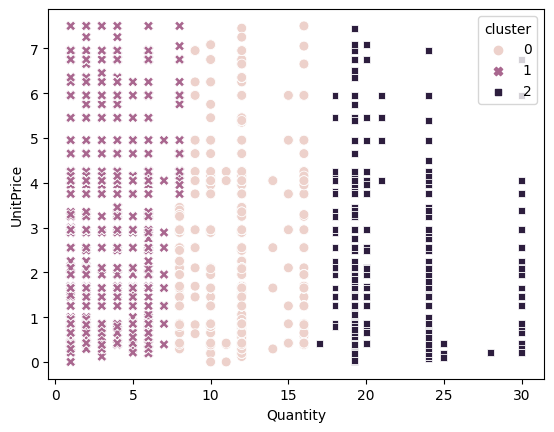

In [ ]:
sns.scatterplot(x='Quantity',
                y='UnitPrice',
                hue='cluster',  #범주별로 색을 다르게지정하겠다는 뜻
                style='cluster', #범주별로 스타일을 다르게 지정하겠다는 뜻
                s=50,
                data=X1)
plt.show()


2.1 위에서 생성한 군집들의 특성을 분석

In [ ]:
df_kmeans = pd.concat([df2, X1['cluster']], axis = 1)

In [ ]:
df_kmeans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany,1
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE,0
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium,0
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands,2
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France,0


In [ ]:
df_kmeans.groupby('cluster').mean()


<ipython-input-32-67d895c37142>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_kmeans.groupby('cluster').mean()


,Quantity,UnitPrice,CustomerID
cluster,,,
0,11.419309,1.619050,13072.598833
1,4.051830,3.601123,13218.253294
2,21.615115,1.293941,13457.605150


In [ ]:
df_kmeans.groupby('cluster').count()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
cluster,,,,,,,,
0,12678,12678,12678,12678,12678,12678,12678,12678
1,13660,13660,13660,13660,13660,13660,13660,13660
2,8350,8350,8350,8350,8350,8350,8350,8350


2.2 각 군집 별 대표 추천 상품

In [ ]:
df_kmeans[df_kmeans['cluster'] == 0]['Description'].value_counts()

PLASTERS IN TIN WOODLAND ANIMALS    131
PLASTERS IN TIN CIRCUS PARADE       120
SPACEBOY LUNCH BOX                  112
PLASTERS IN TIN SPACEBOY            110
RED TOADSTOOL LED NIGHT LIGHT        93
                                   ... 
ENCHANTED BIRD COATHANGER 5 HOOK      1
SPACEBOY MINI BACKPACK                1
PACK OF 72 RETROSPOT CAKE CASES       1
JIGSAW TREE WITH WATERING CAN         1
QUEEN OF SKIES LUGGAGE TAG            1
Name: Description, Length: 1600, dtype: int64

In [ ]:
df_kmeans[df_kmeans['cluster'] == 1]['Description'].value_counts()


POSTAGE                                910
REGENCY CAKESTAND 3 TIER               169
ROUND SNACK BOXES SET OF4 WOODLAND     141
ROUND SNACK BOXES SET OF 4 FRUITS      107
RED RETROSPOT MINI CASES               107
                                      ... 
FOLDING UMBRELLA WHITE/RED POLKADOT      1
BLACK PIRATE TREASURE CHEST              1
MINI PLAYING CARDS SPACEBOY              1
SET OF 4 ROSE BOTANICAL CANDLES          1
DECROTIVEVINTAGE COFFEE GRINDER BOX      1
Name: Description, Length: 1855, dtype: int64

In [ ]:
df_kmeans[df_kmeans['cluster'] == 2]['Description'].value_counts()

PACK OF 72 RETROSPOT CAKE CASES        155
MINI PAINT SET VINTAGE                  79
RABBIT NIGHT LIGHT                      77
SET/10 RED POLKADOT PARTY CANDLES       70
ROUND SNACK BOXES SET OF4 WOODLAND      64
                                      ... 
LED TEA LIGHTS                           1
DOLLY GIRL CHILDRENS EGG CUP             1
HEN HOUSE W FAMILY IN BARN & NEST        1
GLASS CHALICE BLUE SMALL                 1
YULETIDE IMAGES GIFT WRAP SET            1
Name: Description, Length: 1485, dtype: int64

2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천

In [ ]:
df_kmeans.loc[df_kmeans['CustomerID'] == 12413]['cluster'].value_counts()


1    21
0    16
2     1
Name: cluster, dtype: int64

In [ ]:
df_kmeans.loc[(df_kmeans['CustomerID'] == 12413) & (df_kmeans['Description'] == 'POSTAGE')]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
2349,569402,POST,POSTAGE,1.0,10/4/2011 9:00,4.046168,12413.0,France,1
15529,540365,POST,POSTAGE,3.0,1/6/2011 16:12,4.046168,12413.0,France,1


2. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

무엇인가를 추정할 때, 표본의 수가 많을수록 추정의 신뢰도는 올라가고, 

반대로 표본의 수가 적을수록 추정의 신뢰도는 낮아진다. 

그래서 아무리 신뢰구간이라고 하더라도 표본의 수가 너무 적으면 구간의 신뢰도는 떨어지는데, 

그렇다고 신뢰도를 올리기 위해서 무조건 표본을 많이 뽑기에는 시간과 비용이 많이 든다. 

그래서 신뢰구간을 구할 때는, 너무 많지도 또는 너무 적지도 않은 적당한 크기의 표본이 필요하다.


일단 표본크기(n)를 결정할 때는 "허용오차"를 알아야 한다. 

허용오차는 일정 크기 이상은 인정하지 않는 즉 최대한으로 허용하는 오차를 의미한다. 

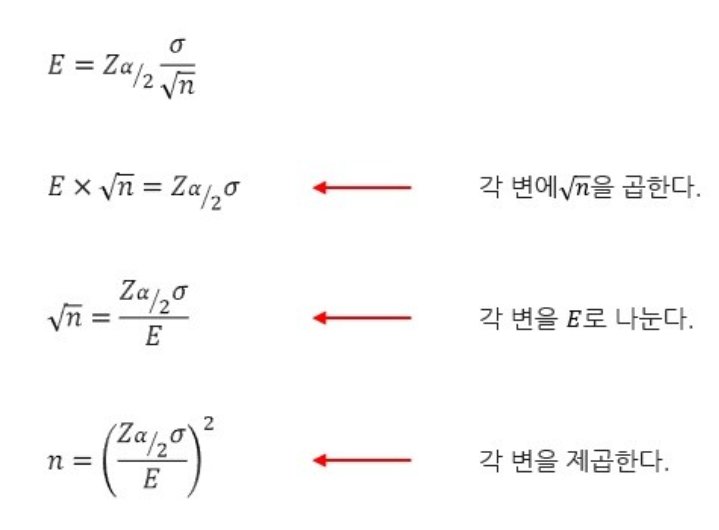

예제1) 어느 과자회사에 생산하는 A과자의 평균용량은 250g으로 알려져 있다. 

그래서 실제로 그러한지를 알아보려고 하는데, 평균에 대해서 허용할 수 있는 오차는 10g으로 설정하였다. 

그리고 과거의 데이터를 분석해보니 표준편차는 30g이라고 한다. 

이때 신뢰수준 90%에 적합한 표본크기를 구하라.

​

풀이)

90%의 신뢰수준이므로 Zα/2 = 1.645 이다. 

그리고 허용오차 E =10 이므로 위의 공식에 의해 표본크기는 다음과 같다.




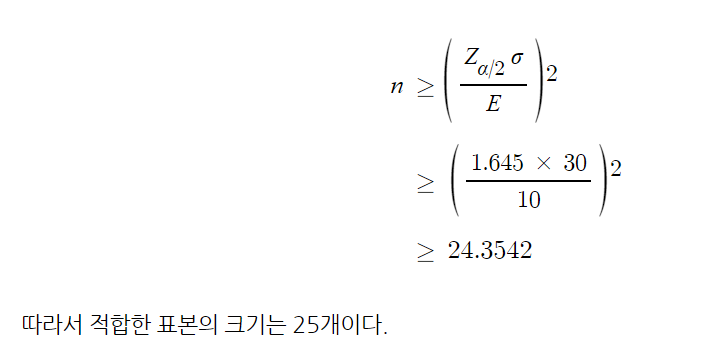

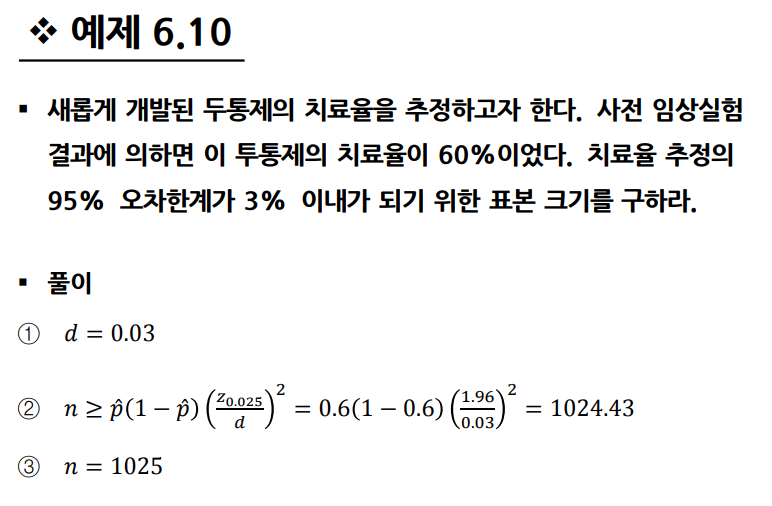

In [2]:
 (1.645/0.05)**2

1082.4099999999999

4. 아래 그래프는 1월부터 9월까지의 은의 가격이다

4.1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

4.2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

<Axes: >

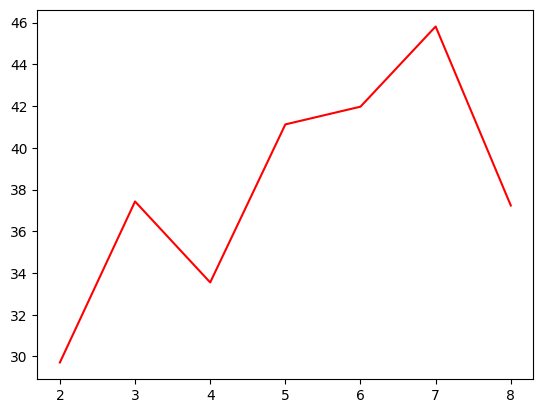

In [7]:
import pandas as pd

dic_var = {'A': [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84,42.49,31.38]}
data = pd.DataFrame(dic_var)

roll_mean3 = pd.Series.rolling(data['A'], window=3, center = False).mean()
roll_mean3.plot(color='red', label='5 day rolling mean')

In [8]:
roll_mean3

0          NaN
1          NaN
2    29.713333
3    37.430000
4    33.550000
5    41.123333
6    41.973333
7    45.816667
8    37.236667
Name: A, dtype: float64

7. 베이지안 회귀

height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

7.1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

베이지안 회귀

시드넘버 1234로 지정

1000번의 burn-in 이후 10,000의 MCMC를 수행

회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

7.2 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [9]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')


df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


In [11]:
!pip install pymc3

import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

with pm.Model() as model: 
    # PyMC3의 모형은 with 문 안에서 사용된다.
    # 사전 확률 정의
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # 선형 회귀 모형 정의
    y_est = alpha + beta * x
    
    # 가능도 분포 정의 
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # 최적화를 사용하여 시작값 추정
    start = pm.find_MAP()
 
    # NUTS MCMC 샘플링 알고리즘 인스턴스 생성
    step = pm.NUTS(scaling=start)
    
    # 샘플링을 사용하여 100개의 사후 샘플 생성
    trace = pm.sampling.sample(100, step=step, start=start, progressbar=False)
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.6 MB/s eta 0:00:00

RuntimeError: ignored

In [ ]:
plt.scatter(x, y, c=y, marker='v', cmap=mpl.cm.jet)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)